## Customer Segmentation for Mall Customers Dataset

In [2]:
#Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
mall_customers=pd.read_csv("Mall_customers.csv")
mall_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## know about the data

In [4]:
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_customers.isnull().sum()
#from this we could see there are no null data

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Analyze/vizualize datas

Text(0.5, 1.0, 'Gender ratio')

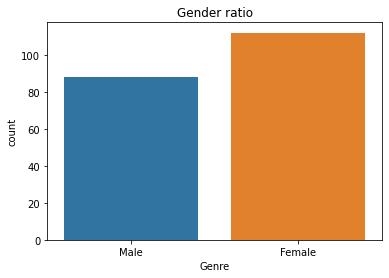

In [7]:
#for visualizing the data
import seaborn as sns
sns.countplot(x='Genre',data=mall_customers)
plt.title('Gender ratio')

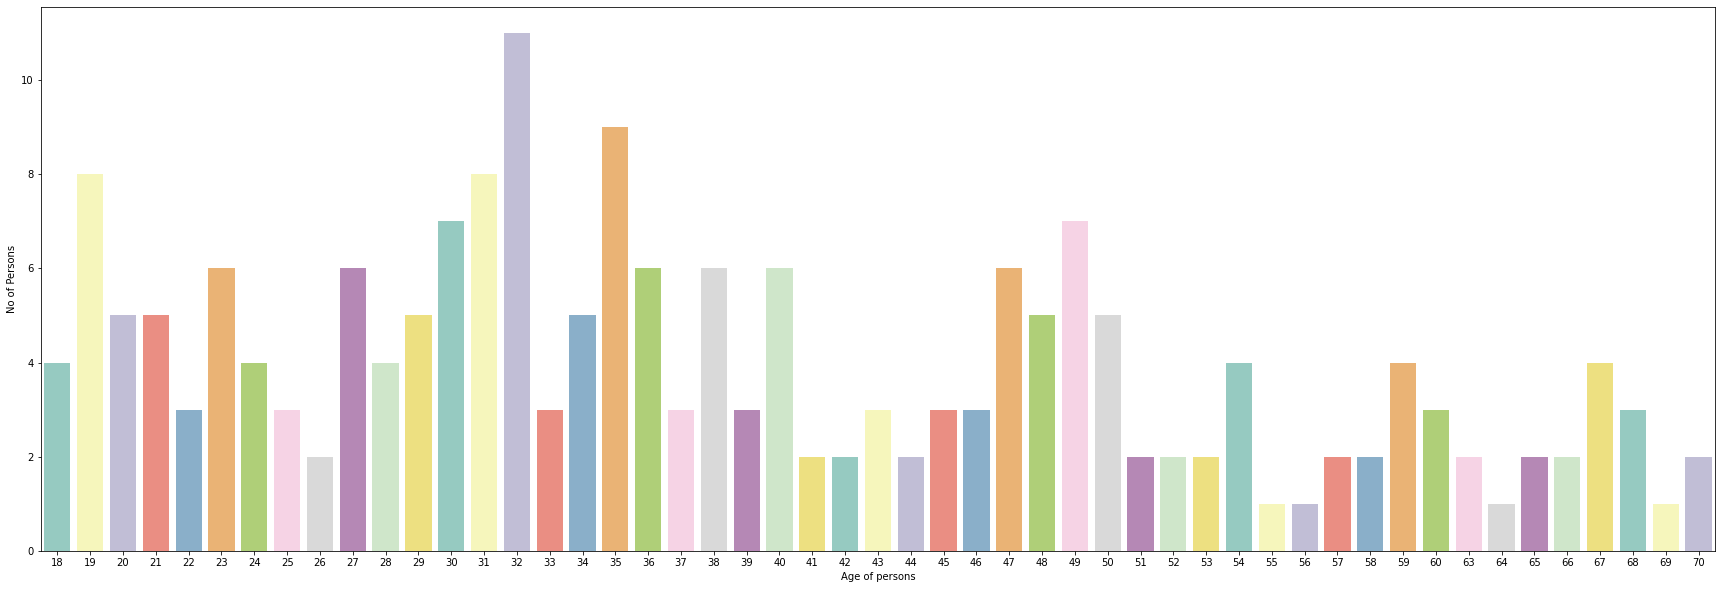

In [8]:
#age Visualization
plt.figure(figsize=(30,10))
sns.countplot(mall_customers.Age,palette="Set3")
plt.xlabel("Age of persons")
plt.ylabel("No of Persons")
plt.show()

In [9]:
#Rename the column to visualize annual income and spending score
mall_customers = mall_customers.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

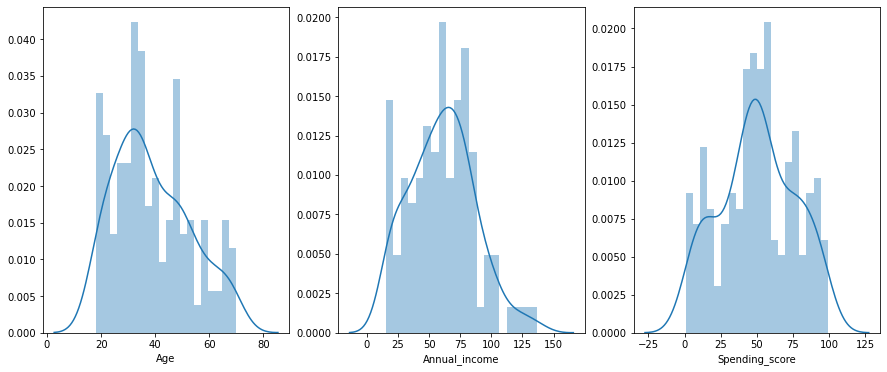

In [14]:
#analyze Age,annual Income and spending score
plt.figure(1 , figsize = (15 , 6))
features=["Age","Annual_income","Spending_score"]
pos=1
for i in features:
    plt.subplot(1 , 3 , pos)
    sns.distplot(mall_customers[i],bins=20,kde=True)
    pos+=1

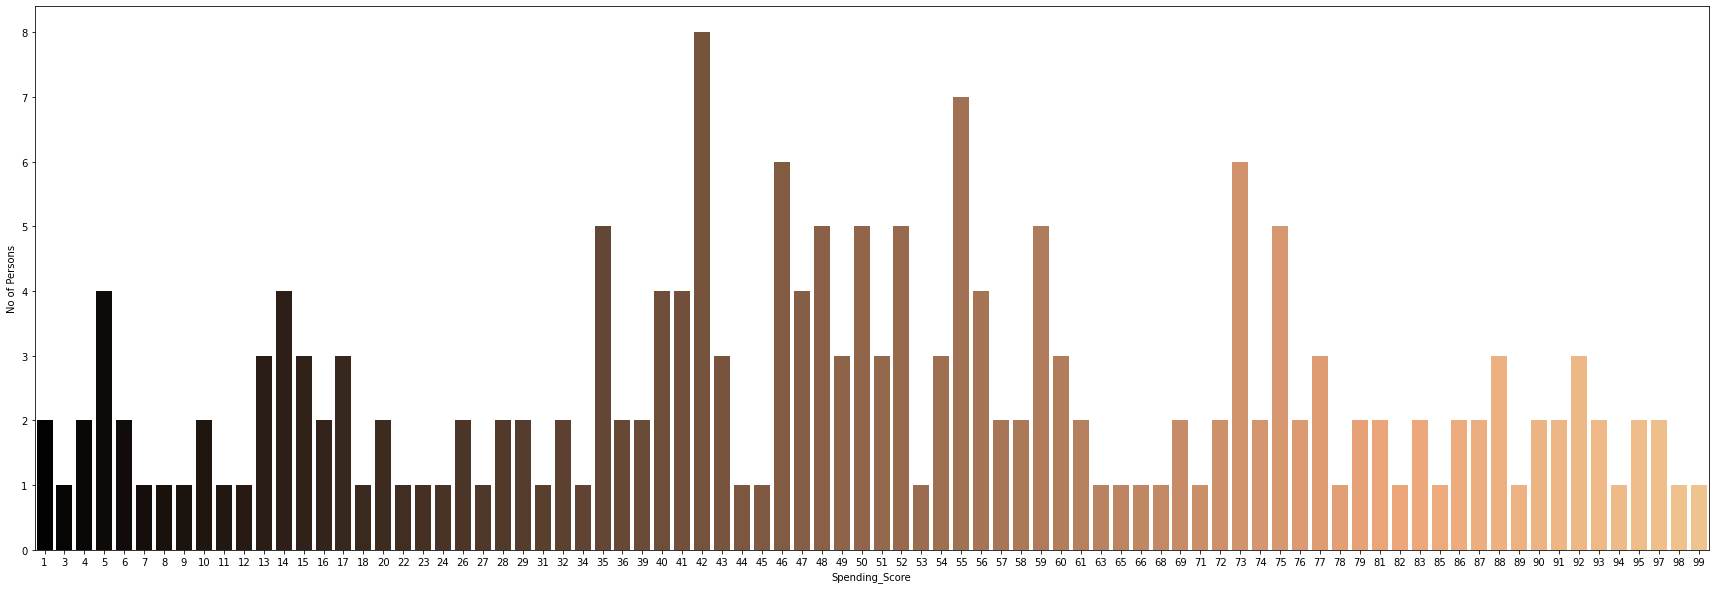

In [15]:
#visualize Spending score
plt.figure(figsize=(30,10))
sns.countplot(mall_customers.Spending_score,palette="copper")
plt.xlabel("Spending_Score")
plt.ylabel("No of Persons")
plt.show()

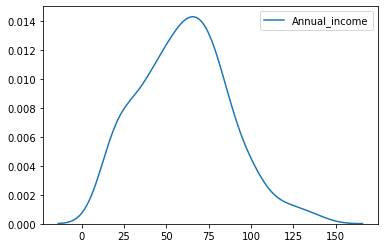

In [16]:
#visualize annual income
sns.kdeplot(mall_customers.Annual_income)

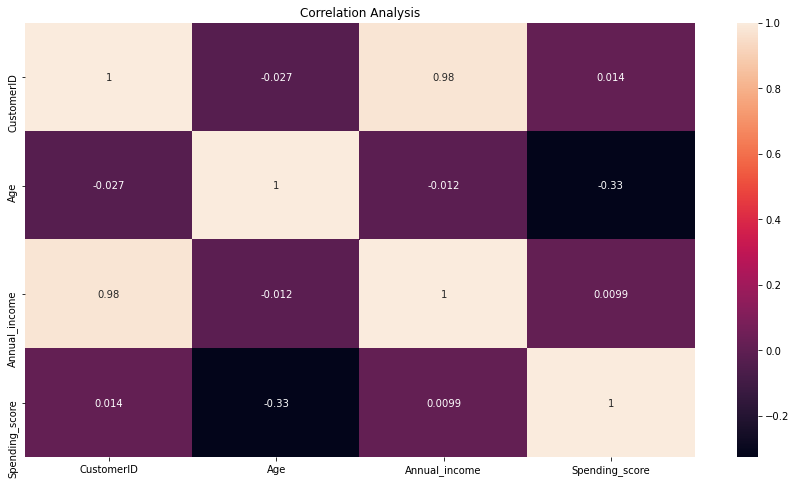

In [22]:
#relationship analysis using heatmap
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(mall_customers.corr(), annot = True)
plt.title('Correlation Analysis')
plt.show()

## K means clustering

## Elbow method->To find optimal number of clusters

In [18]:
from sklearn.cluster import KMeans
X=mall_customers.loc[:,["Age", "Annual_income", "Spending_score"]]
inertia = []
k = range(1,10)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

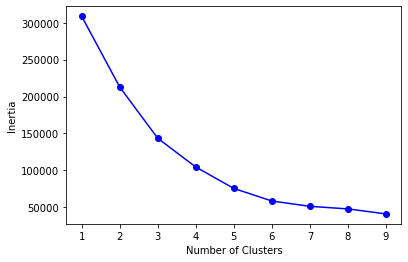

In [19]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### now the optimal cluster is 5

#### clustering using K means

In [27]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [32]:
import plotly.graph_objs as go
import plotly as py
trace1 = go.Scatter3d(
    x= X['Spending_score'],
    y= X['Annual_income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

# CONCLUSION

#### Yellow Cluster - The yellow cluster groups young people with moderate to low annual income who actually spend a lot. 

#### Purple Cluster - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot

#### Pink Cluster - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.

#### Orange Cluster - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.

#### Blue Cluster - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.